1️⃣ Dataset Selection and Description (5 Marks)
 - Choose a dataset from Kaggle or other sources.
 - Provide a brief description of your dataset:
   - Context or background.
   - Number of rows and columns.
   - Explanation of key columns.


In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('laptop_data.csv')
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


The dataframe consists of different features of laptops. Here are names of models of different laptops from various companies. They vary in their specifications and thus have varied prices for them.

In [198]:
print('The dataset has',df.shape[0],'rows and',df.shape[1],'columns.')

The dataset has 1303 rows and 12 columns.


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Here is a short description to the columns of the dataset:
 - Unnamed- Unique id for each laptop of the dataset.
 - Company- Manufacturing company of the laptop.
 - Typename- What type of laptop is it.
 - Inches- Display size of the laptop.
 - ScreenResolution- The resolution of the display, depicts the quality of the display.
 - Cpu- Central Processing Unit of the laptop.
 - Ram- Size of the memory of RAM.
 - Memory- Storage size of the laptop.
 - Gpu- Graphics processing unit of the laptop.
 - OpSys- Operating system of the laptop.
 - Weight- Weight of the laptop.
 - Price- Price of the laptop.

2️⃣Create the following visualizations using Seaborn:
 - Histogram/Distplot: Display the distribution of a numeric variable. (10 Marks)
 - Pairplot: Show pairwise relationships between numerical variables. (10 Marks)
 - Heatmap: Visualize correlations between numerical features. (10 Marks)
 - Jointplot: Analyze the relationship between two variables, including marginal distributions. (10 Marks)

4️⃣ Insights and Observations (15 Marks)
 - For each plot, write a short interpretation of your findings.
 - Highlight any significant trends, relationships, or outliers.



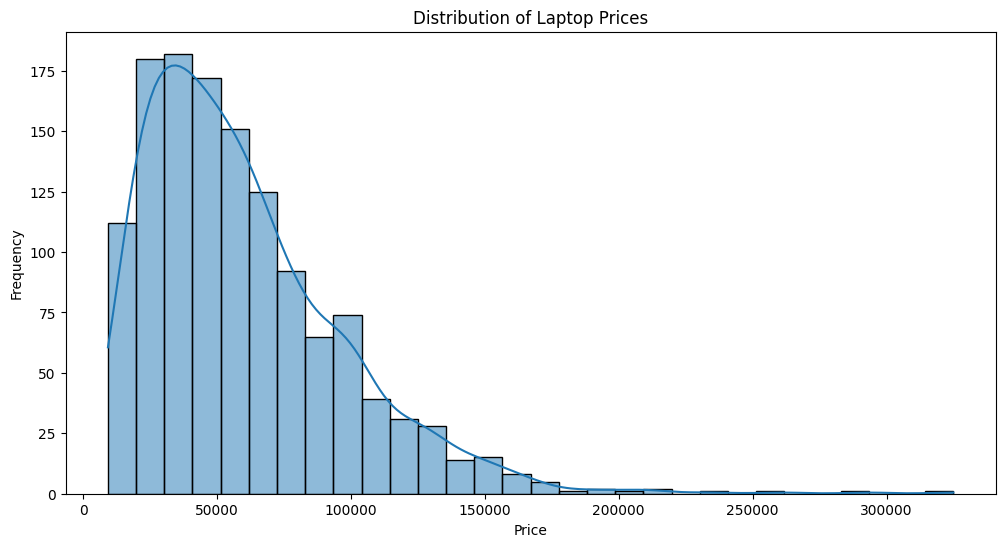

In [200]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)  
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

There are more laptops with lower prices than higher priced ones. The spread of the price range is quite wide, ranging from around 10,000 to over 300,000. There are some outliers at the right side which indicates very expensive laptops.

<Figure size 1200x600 with 0 Axes>

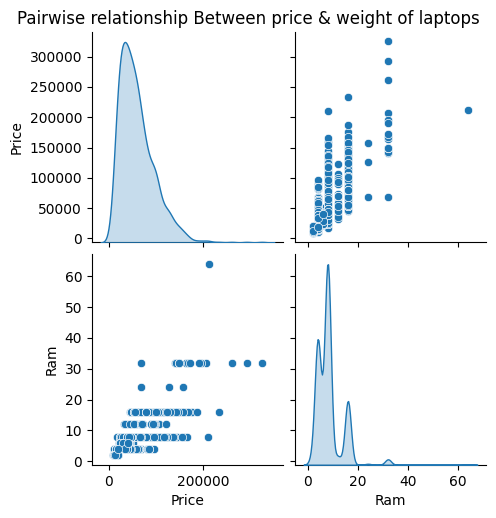

In [201]:
df['Ram'] = df['Ram'].str.replace('GB', '', regex=False)  
df['Ram'] = df['Ram'].astype(int)
plt.figure(figsize=(12, 6))
sns.pairplot(df, vars=['Price', 'Ram' ], diag_kind='kde')
plt.suptitle('Pairwise relationship Between price & weight of laptops', y=1.02)
plt.show()

The top left plot shows the distribution of price. From this it can concluded that most laptops are priced lower. The bottom right plot shows the distribution of display size, it shows that the display was maximum at around 15 inches. The other two plots show the scatter plot of price and display size.The scatter plot shows that there is lesser positive correlation between price and display size. There are some laptops with very high prices that have a relatively small display size.So it can be said that price and display size are not the only factors that determine the price of a laptop.

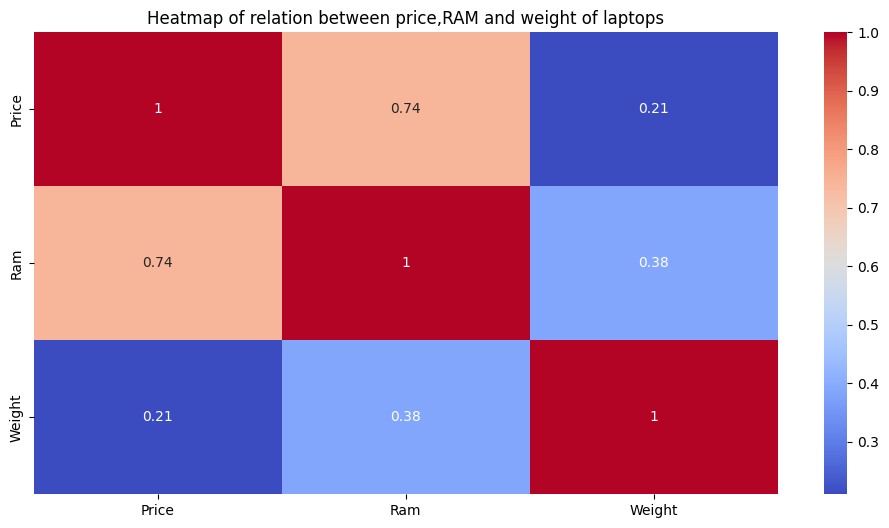

In [202]:
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)  
df['Weight'] = df['Weight'].astype(float)
relation = df[['Price', 'Ram', 'Weight']].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(relation, annot=True, cmap='coolwarm')
plt.title('Heatmap of relation between price,RAM and weight of laptops')
plt.show()

The heatmap shows a strong positive correlation (0.74) between price and RAM. Thus laptops with higher RAM tend to be more expensive. There is a lesser positive correlation (0.21) between price and weight. So tendency for heavier laptops to be more expensive, this correlation is not as strong as that between price and RAM.

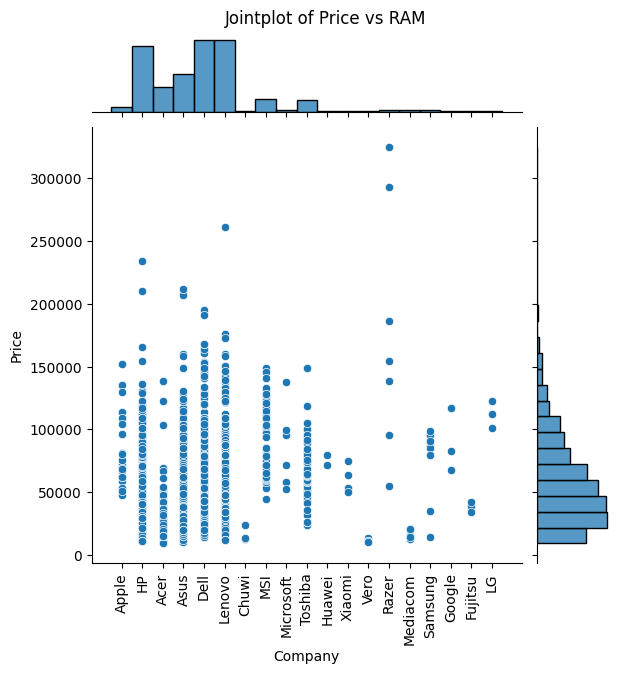

In [203]:
sns.jointplot(x='Company', y='Price', data=df, kind='scatter', marginal_kws=dict(bins=25, fill=True))
plt.suptitle('Jointplot of Price vs RAM', y=1.02)
plt.xticks(rotation='vertical')
plt.show()

There are very few companies whose laptops are priced above 100,000. The highest price range is for laptops made by companies like Razer, Mediacom, and Lenovo. Most laptops priced below 100,000 are manufactured by Dell, Lenovo, Acer, HP and ASUS. So the price of laptops is not strongly correlated with the manufacturing company. There are some outliers of HP, Lenovo & Razer.

3️⃣ Categorical Data Visualization (20 Marks)
Use Seaborn to analyze and visualize categorical data:
 - Bar Plot: Compare categories using aggregation. (10 Marks)
 - Box Plot/Violin Plot: Visualize the distribution of a numeric variable across categories. (10 Marks)


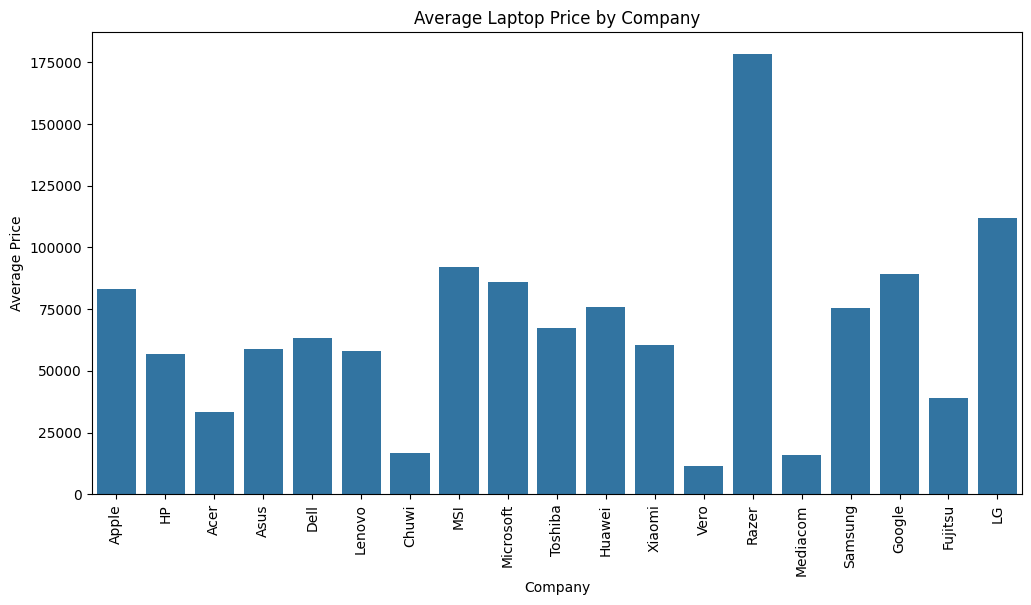

In [204]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Price', data=df,estimator='mean',errorbar=None)
plt.title('Average Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation='vertical')
plt.show()

Razer has the highest average price of laptops. Vero has the lowest average price of laptops. Apple, MSI, Microsoft, Google, Huawei, Samsung & LG all have high average prices above 75,000. HP, ASUS, Dell, Lenovo, Toshiba, Xiaomi all have average laptop prices close to 50,000 to 75,000.

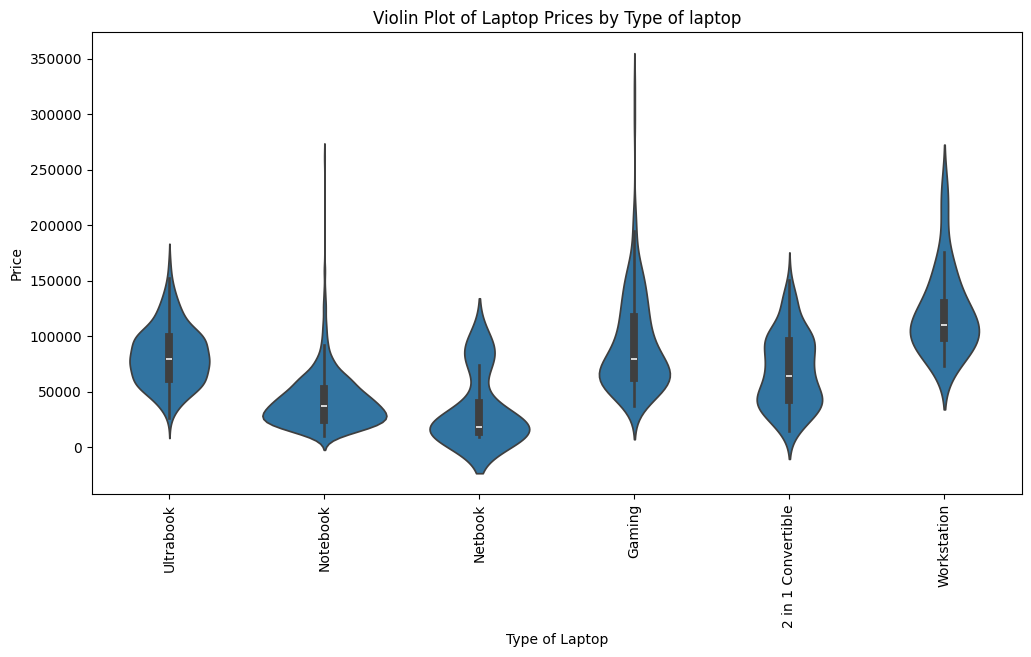

In [205]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='TypeName', y='Price', data=df)
plt.title('Violin Plot of Laptop Prices by Type of laptop')
plt.xlabel('Type of Laptop')
plt.ylabel('Price')
plt.xticks(rotation='vertical')
plt.show()

The width of the violin at a given price point corresponds to the number of laptops at that price.The plot shows that prices are generally higher for Workstation, Gaming, and Notebook laptops than for other types of laptops.Ultrabooks and Netbooks have lower price ranges than other types of laptops.Gaming category has the most outliers where some laptops priced above the rest of the distribution.The Workstation category also shows some outliers.